In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.differentiate import derivative

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Juan Sebastian Buitrago Díaz
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [63]:
def five_point_derivative(f, x, h):
    """
    Calcula la derivada de cinco puntos para una función f en un conjunto de puntos x con paso h.

    Parámetros:
    - f: función a derivar.
    - x: array de puntos donde evaluar la derivada.
    - h: paso entre puntos en el array x.

    Retorna:
    - Array de las derivadas aproximadas en cada punto de x.
    """
    n = len(x)  # Número de puntos
    fprime = np.zeros_like(x)  # Array para almacenar las derivadas

    for i in range(n):
        if i == 0:
            # Derivada adelantada para el primer punto
            fprime[i] = (-25 * f(x[i]) + 48 * f(x[i] + h) - 36 * f(x[i] + 2 * h) + 16 * f(x[i] + 3 * h) - 3 * f(x[i] + 4 * h)) / (12 * h)
        elif i == n - 1:
            # Derivada atrasada para el último punto
            fprime[i] = (25 * f(x[i]) - 48 * f(x[i] - h) + 36 * f(x[i] - 2 * h) - 16 * f(x[i] - 3 * h) + 3 * f(x[i] - 4 * h)) / (12 * h)
        else:
            # Derivada centrada para los puntos intermedios
            fprime[i] = (f(x[i] - 2 * h) - 8 * f(x[i] - h) + 8 * f(x[i] + h) - f(x[i] + 2 * h))/ (12 * h)
    return fprime

In [64]:
f=lambda x: np.cos(x)
d_f=lambda x: -np.sin(x)
x=np.linspace(0,2*np.pi,10)
h=0.1
print(f'El valor de la derivada de cinco puntos para cada punto del intervalo es: {five_point_derivative(f,x,h)}')

El valor de la derivada de cinco puntos para cada punto del intervalo es: [ 3.31255132e-06 -6.42785470e-01 -9.84804474e-01 -8.66022520e-01
 -3.42019005e-01  3.42019005e-01  8.66022520e-01  9.84804474e-01
  6.42785470e-01 -3.31255132e-06]


In [65]:
x=np.array([np.pi/8])
h=np.linspace(0.01,1,10)
df_I=[]
Error=[]
for i in h:
  df_i=five_point_derivative(f, x,i)
  df_I.append(df_i)
  error=abs(df_i-d_f(x))
  Error.append(error)
for i in range(len(h)):
  print(f'El valor de f′(π/8) para h={h[i]} es: {df_I[i]} y su error es {Error[i]}')

El valor de f′(π/8) para h=0.01 es: [-0.38268343] y su error es [7.96070043e-10]
El valor de f′(π/8) para h=0.12 es: [-0.38266032] y su error es [2.31131085e-05]
El valor de f′(π/8) para h=0.23 es: [-0.38229471] y su error es [0.00038873]
El valor de f′(π/8) para h=0.34 es: [-0.38053513] y su error es [0.0021483]
El valor de f′(π/8) para h=0.45 es: [-0.37546033] y su error es [0.0072231]
El valor de f′(π/8) para h=0.56 es: [-0.36453399] y su error es [0.01814944]
El valor de f′(π/8) para h=0.67 es: [-0.34523712] y su error es [0.03744631]
El valor de f′(π/8) para h=0.78 es: [-0.31597644] y su error es [0.06670699]
El valor de f′(π/8) para h=0.89 es: [-0.27709178] y su error es [0.10559166]
El valor de f′(π/8) para h=1.0 es: [-0.23174167] y su error es [0.15094176]


In [66]:
def second_diff(f, x, h):
  '''
  Aproxima la segunda derivada de f en x usando la diferencia finita centrada.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: segunda derivada de f en x
  '''
  return (f(x + h) - 2 * f(x) + f(x - h)) / (h**2)

In [67]:
h=0.05
df2=lambda x: -np.cos(x)
error=abs(second_diff(f,np.pi/8,h)-df2(x))
print(f'El valor de f′′(π/8) para h = {0.5} es: {second_diff(f,np.pi/8,h)} y su error es {error}')

El valor de f′′(π/8) para h = 0.5 es: -0.9236870736474943 y su error es [0.00019246]


<ipython-input-68-232710270>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


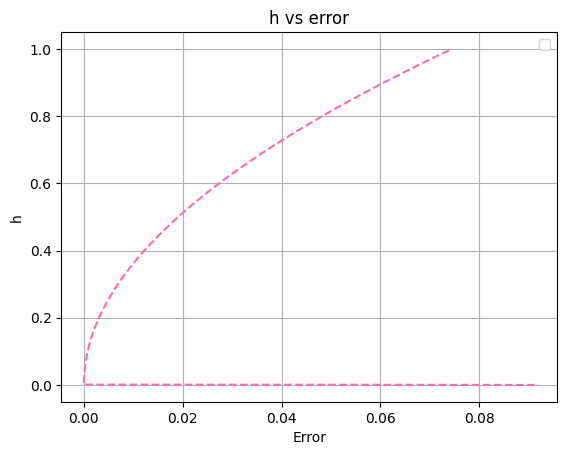

In [68]:
h=np.linspace(2*1e-8,1,1000)
plt.plot(abs(second_diff(f,np.pi/8,h)-df2(x)),h, color ="hotpink", ls="--")
plt.title('h vs error')
plt.ylabel('h')
plt.xlabel('Error')
plt.legend()
plt.grid()
plt.show()

# El error mejora, es decir, se hace más pequeño a medida que h disminuye, sin embargo, cuando h toma valores demasiado pequeños, cercanos a cero el error aumenta

#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

In [69]:
def forward_diff(f, x, h):
  '''
  Aproxima la primera derivada de f en x usando la diferencia finita hacia adelante.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: primera derivada de f en x
  '''
  return (f(x + h) - f(x)) / h

def backward_diff(f, x, h):
  '''
  Aproxima la primera derivada de f en x usando la diferencia finita hacia atrás.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: primera derivada de f en x
  '''
  return (f(x) - f(x - h)) / h

def centered_diff(f, x, h):
  '''
  Aproxima la primera derivada de f en x usando la diferencia finita centrada.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: primera derivada de f en x
  '''
  return (f(x + h) - f(x - h)) / (2 * h)

#Función de diferencias finitas
def Diferencias_Finitas(f, h):
  '''
  Calcula la primera derivada de f usando las diferencias finitas.
  f: función
  h: paso de discretización
  return: primera derivada de f usando las diferencias finitas (función)
  '''
  def Derivada(x):
    '''
    Calcula la primera derivada de f en x usando las diferencias finitas.
    x: punto en el que se quiere calcular la derivada
    return: primera derivada de f en x
    '''
    n = len(x)
    fprime = np.zeros_like(x, dtype=float) # Crea un array para guardar los datos
    for i in range(n):
      if i == 0: # Condicion para el primer punto
        fprime[i] = forward_diff(f, x[i], h)
      elif i == n-1: # Condición para el último punto
        fprime[i] = backward_diff(f, x[i], h)
      else:
        fprime[i] = centered_diff(f, x[i], h) # Diferencias centradas
    return fprime

  return Derivada

In [70]:
f=lambda x: x*np.exp(x)
df=lambda x: np.exp(x)+x*np.exp(x)
d2f=lambda x: x*np.exp(x)+2*np.exp(x)
x=np.array([2.0])
h=0.01
print(f'El valor de la derivada numérica para x=2 es: {Diferencias_Finitas(f,h)(x)}')
print(f'El valor de la segunda derivada numérica para x=2 es: {second_diff(f,x,h)}')

El valor de la derivada numérica para x=2 es: [22.31556703]
El valor de la segunda derivada numérica para x=2 es: [29.55659385]


In [71]:
f=lambda x: x*np.exp(x)
df=lambda x: np.exp(x)+x*np.exp(x)
d2f=lambda x: x*np.exp(x)+2*np.exp(x)
x=np.linspace(1.8,2.2,6)
h=0.01
print(f'El valor de la derivada numérica para cada punto del intervalo es: {Diferencias_Finitas(f,h)(x)}')
print(f'El valor de la segunda derivada numérica para cada punto del intervalo es: {second_diff(f,x,h)}')

El valor de la derivada numérica para cada punto del intervalo es: [17.05444164 18.87462703 21.01459499 23.38009798 25.99385989 28.69129776]
El valor de la segunda derivada numérica para cada punto del intervalo es: [22.98895277 25.42791999 28.11368778 31.07044826 34.32471134 37.90552299]


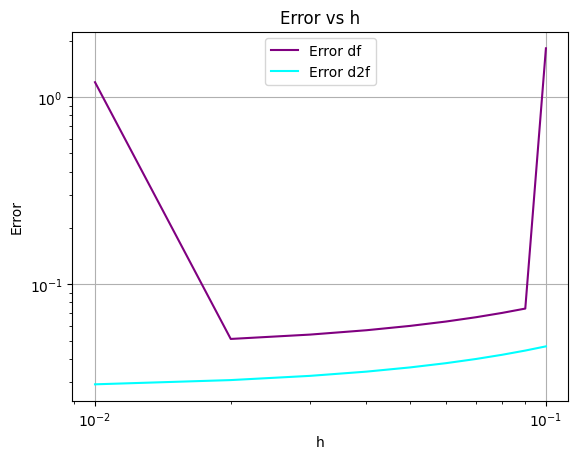

In [108]:
f=lambda x: x*np.exp(x)
df=lambda x: np.exp(x)+x*np.exp(x)
d2f=lambda x: x*np.exp(x)+2*np.exp(x)
x=np.linspace(1.8,2.2,10)
H=np.linspace(0.01,0.1,10)

err_df=[]
err_d2f=[]
for i in H:
  df_i=Diferencias_Finitas(f,i)(x)
  d2f_i=second_diff(f,x,i)
  error_df=abs(df_i-df(x))
  error_d2f=abs(d2f_i-d2f(x))
  err_df.append(error_df)
  err_d2f.append(error_d2f)

plt.plot(H,error_df,color="purple",label="Error df")
plt.plot(H,error_d2f,color="cyan",label="Error d2f")
plt.title('Error vs h')
plt.ylabel('Error')
plt.xlabel('h')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

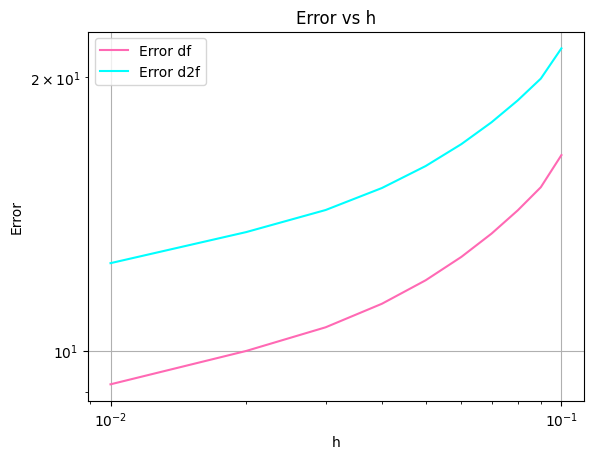

In [106]:
f=lambda x: x*np.exp(x)
df=lambda x: np.exp(x)+x*np.exp(x)
d2f=lambda x: x*np.exp(x)+2*np.exp(x)
x=np.linspace(1.8,2.2,10)
H=np.linspace(0.01,0.1,10)

err_df=[]
err_d2f=[]
for i in H:
  df_grad=np.gradient(f(x),i)
  d2f_grad=np.gradient(df(x),i)
  error_df=abs(df_grad-df(x))
  error_d2f=abs(d2f_grad-d2f(x))
  err_df.append(error_df)
  err_d2f.append(error_d2f)

plt.plot(H,error_df,color="hotpink",label="Error df")
plt.plot(H,error_d2f,color="cyan",label="Error d2f")
plt.title('Error vs h')
plt.ylabel('Error')
plt.xlabel('h')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()